#### Research Question: 

Does relationship status (single vs. not single) influence an individual’s life satisfaction?

#### Variables 
WELLNESS_life_satisfaction and DEMO_relationship_status_single (binary / unpaired)

A histogram for DEMO_relationship_status_single would be helpful for visualizing the amount of people in a relationship and not in a relationship.

A Histogram for WELLNESS_life_satisfaction effectively shows how many individuals selected each life satisfaction value (1 through 10). This provides a clear picture of the overall distribution.

#### Analysis
Explore the data:
- Unique values.
- Amount of mising data / clean the data
- Number of observation in each dataset.

##### Visualize the data and descriptive statistics:
- Boxplot:
Create a box plot for WELLNESS_life_satisfaction for each category of DEMO_relationship_status_single. A boxplot will help visualize the median, and the interquartile range of the life satisfaction for both categories of relationship status. This will help us determine the difference in spread, central tendency, skewness and any outliers between groups.

- Histogram and mean
Create one histogram for each category of DEMO_relationship_status_single. We will do this to understand the distribution of the data, the size of the data and to show the mean of the data by including it in each graph.

- KDE / Violin
Use either a KDE or Violin plot to understand the distribution and get a generalize image of the dataset. Will determine if the graphs are bimodal, skewed, or uniform. An easy way to visulaize if one group has higher scores or greater variability.

##### Test the Null Hypothesis 
- Two Tailed Permutation Test:
A permutation test evaluates whether the observed difference between the two groups is significant by comparing it to a distribution of differences generated under the null hypothesis (no relationship between WELLNESS_life_satisfaction and relationship_status).

##### Bootstrapping.
- Bootstrapping the mean.
For your discrete WELLNESS_life_satisfaction data, bootstrapping would give a robust estimate of the confidence interval for the mean difference between the two relationship_status groups.

##### Simple Linear Regression
Use linear regression to determine the relationship between the dependent variable WELLNESS_life_satisfaction and the relationship_status. Look at the coefficients, R-Squared, P-values and visualize the results with a scatter plot and a line of best fit. Model If you were modeling each group (relationship_status = 0 and relationship_status = 1) independently and together. This will help us determine if the dependent variable is influenced by the independent variable.

##### Bootstrapping the simple linear regression
Bootstrapping and confidence interval graphs provide a robust and intuitive approach to evaluate and present the reliability of your regression analysis. They are particularly helpful in non-ideal conditions, such as small sample sizes or when assumptions of linear regression are not fully met. These tools ensure that your conclusions are based on a nuanced understanding of uncertainty, enhancing both the accuracy and credibility of your results. Would you like guidance on how to implement this process?

##### Multivariate Linear Regression with datasets.
Yes, conducting a multivariate analysis on surveys taken at different times can provide valuable insights, especially if you're interested in understanding changes, patterns, or relationships between variables over time. Here's why and how you might approach it. This approach may help us determine if relationship status is impacting people's wellness more, or less as the years go by and as policies change and people are becoming aware.

The primary assumption is that the relationship between the binary independent variable (relationship_status) and the dependent variable (WELLNESS_life_satisfaction) is linear. For a binary variable, this means that the difference in mean life satisfaction between the two groups can be represented as a straight line with two levels (one for each category of relationship_status). Applying Bootstrapping and Permutation Tests to Regression Analysis
Bootstrapping and permutation tests can be used to strengthen linear regression analyses, particularly when assumptions like normality of residuals are uncertain. Bootstrapping involves resampling the dataset with replacement and performing the regression analysis on each resampled set. This generates a distribution of regression coefficients, allowing you to calculate confidence intervals that are robust to non-normality and small sample sizes. For instance, a 90% bootstrap confidence interval for a regression coefficient would indicate that you are 90% confident that the true population coefficient falls within that interval. Permutation tests, on the other hand, shuffle the relationship status labels to create new datasets under a null hypothesis of no relationship between variables. The observed difference in life satisfaction between relationship groups is then compared to the distribution of differences generated by these permutations. A small p-value from the permutation test would suggest that the observed difference is unlikely to occur by chance, providing evidence against the null hypothesis. Importantly, permutation tests do not rely on parametric assumptions, making them a valuable tool when the data's distribution is unclear


#### Hypothesis
H_0: There is no difference in WELLNESS_life_satisfaction between individuals in a relationship and those who are single.

H_1: There is a difference in WELLNESS_life_satisfaction between individuals in a relationship and those who are single.

The hypothesis—that there is a significant difference in WELLNESS_life_satisfaction based on relationship status—is clear and reasonable given the context of the study. Research has established the importance of social connections, including romantic relationships, for psychological well-being and life satisfaction.

This analysis could reveal whether relationship status significantly impacts life satisfaction, showing, for instance, if singles or non-singles report higher well-being, or if there’s no meaningful difference. Such findings are valuable for understanding how social factors relate to happiness, potentially guiding mental health and community-based policies aimed at improving well-being.

By analyzing these variables, the project not only sheds light on key social dynamics but also applies statistical methods relevant to social science and public health objectives. This ensures that the results of the analysis are both theoretically grounded and practically significant, directly answering the research question.

In [36]:
import pandas as pd

# na_values Turns values into NaN
data = pd.read_csv('../Datasets/CSCS_data_anon.csv', 
                   na_values=["9999", "", " ", "Presented but no response", "NA"],
                   low_memory=False)

cols = pd.read_csv('../Datasets/var_names.csv')

empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

In [52]:
df_1 = data[['WELLNESS_life_satisfaction', 'DEMO_relationship_status_single', 'DATASET']].copy()

In [40]:
df_1.WELLNESS_life_satisfaction.unique()

array([ 2.,  7.,  5.,  4.,  8.,  1.,  6.,  9., nan,  3., 10.])

In [42]:
df_1.DEMO_relationship_status_single.unique()

array(['Not Selected', 'Single', nan], dtype=object)

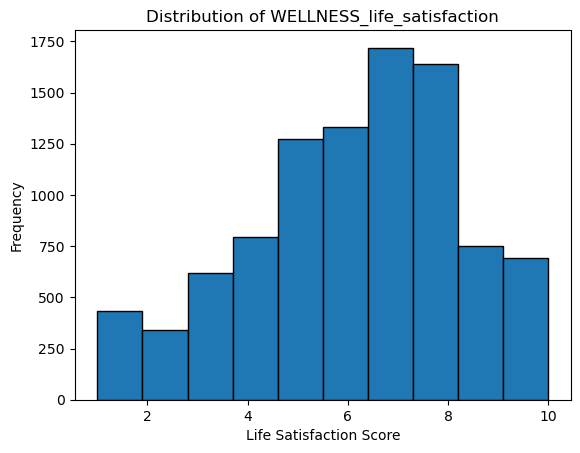

In [87]:
import matplotlib.pyplot as plt

plt.hist(df_1['WELLNESS_life_satisfaction'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of WELLNESS_life_satisfaction')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frequency')
plt.show()


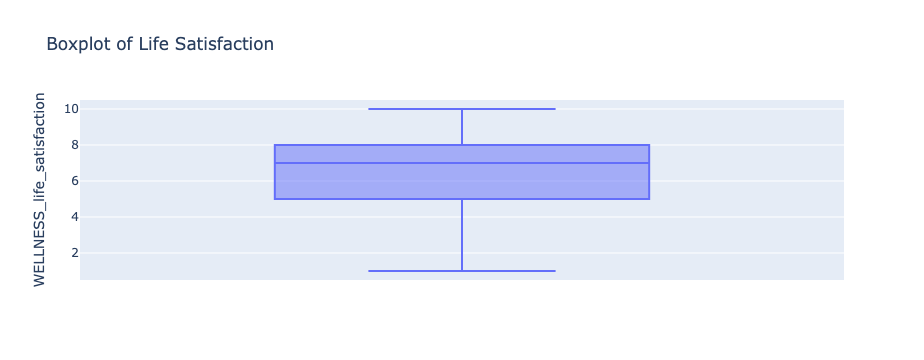

In [300]:
fig = px.box(df_1, y='WELLNESS_life_satisfaction', title='Boxplot of Life Satisfaction')
fig.show()


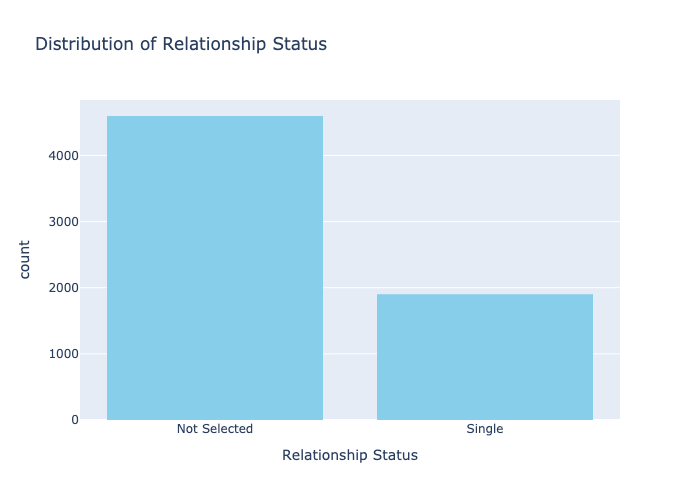

In [260]:
import plotly.express as px

fig = px.histogram(
    df_1.DEMO_relationship_status_single,
    x='DEMO_relationship_status_single',
    title='Distribution of Relationship Status',
    labels={'DEMO_relationship_status_single': 'Relationship Status'},
    color_discrete_sequence=['skyblue']
)
fig.show(renderer='png')

#### Research Question:

How does the number of close friends relate to subjective happiness, as measured by the WELLNESS_subjective_happiness_scale_happy?

#### Variables 
WELLNESS_subjective_happiness_scale_happy and CONNECTION_social_num_close_friends

Histogram of WELLNESS_subjective_happiness_scale_happy clearly shows the frequency distribution of happiness levels, making it easy to identify patterns such as skewness, concentration, or gaps in responses. It effectively represents the ordered nature of the data, providing insight into which levels are most or least common. Additionally, its simplicity and ability to highlight distributional trends make it an intuitive choice for this analysis.

A bar plot would highlight the frequency of each number of close friends, showing the most common group sizes and the spread across the dataset. This visualization helps identify whether most people report having a few, several, or no close friends, providing insights into social connectivity trends.

A scatter plot showing WELLNESS_subjective_happiness_scale_happy on the y-axis and CONNECTION_social_num_close_friends on the x-axis would help explore the relationship between the number of close friends and happiness levels.

#### Analysis

Explore the data:
- Unique values.
- Amount of mising data / clean the data
- Number of observation in each dataset.

##### Visualize the data and descriptive statistics:
Box plot:
- a method of visualizing the distribution of a continuous variable (CONNECTION_social_num_close_friends) across categories of an ordinal variable (WELLNESS_subjective_happiness_scale_happy). It is useful because it summarizes the central tendency (median), variability (interquartile range), and presence of outliers within each category, making it easy to compare distributions across groups. By capping outliers and ordering the x-axis, the plot becomes clearer and more interpretable, highlighting meaningful trends between happiness levels and the number of close friends.

##### Linear Regression Analysis 
Linear regression is an appropriate method to analyze the relationship between the discrete happiness scale (1–7) and the number of close friends, as it assumes a linear relationship between variables, independence of observations, homoscedasticity of residuals, and approximate normality of residuals; these assumptions will be tested using scatter plots, residual analysis, and normality checks, with adjustments like transformations or robust methods applied if violations occur.

##### Bootstrapping to generate confidence intervals for regression coefficients.
Bootstrapping is an appropriate method to generate confidence intervals for regression coefficients in this context, as it does not rely on assumptions of normality or homoscedasticity; instead, it resamples the data repeatedly to estimate the variability of coefficients, addressing potential violations of these assumptions while maintaining robustness.


#### Hypothesis
H_0 :There is no association between the number of close friends and happiness levels.

H_1: There is an association between the number of close friends and happiness levels.

The results will be relevant in answering the research question by determining whether close friendships significantly contribute to subjective happiness, offering valuable insights into the role of social connections in promoting well-being.

In [250]:
df_2 = data[['WELLNESS_subjective_happiness_scale_happy', 'CONNECTION_social_num_close_friends', 'DATASET']].copy()

In [252]:
df_2.WELLNESS_subjective_happiness_scale_happy.unique()

array([nan, '7 - A very happy person', '1 - Not a happy person', '5', '6',
       '2', '4', '3'], dtype=object)

In [274]:
df_2.CONNECTION_social_num_close_friends.unique()

array([ nan,   5.,   6.,   7.,   2.,   0.,   4.,   3.,  18.,   1.,  10.,
        12.,   8.,  17.,  11.,  20.,  14.,   9.,  16.,  15.,  25.,  13.,
        30.,  40., 150.,  60.,  24.,  19.,  23.,  27.,  50.,  22.,  35.,
       100.,  21., 106.,  33.])

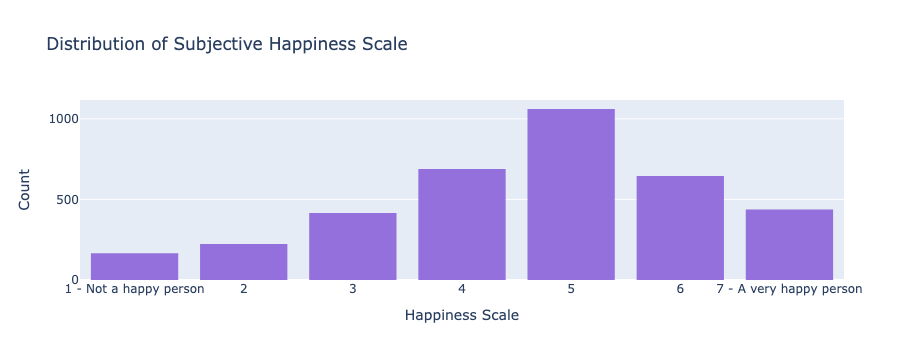

In [266]:
fig = px.histogram(
    df_2.WELLNESS_subjective_happiness_scale_happy,
    x='WELLNESS_subjective_happiness_scale_happy',
    title='Distribution of Subjective Happiness Scale',
    labels={'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale'},
    color_discrete_sequence=['mediumpurple']
)

# Customize layout
fig.update_layout(
    xaxis_title='Happiness Scale',
    yaxis_title='Count',
    xaxis_categoryorder='array',
    xaxis_categoryarray=[
        '1 - Not a happy person', '2', '3', '4', '5', '6', '7 - A very happy person', 'Missing'
    ],
    bargap=0.2
)

# Show the plot
fig.show()

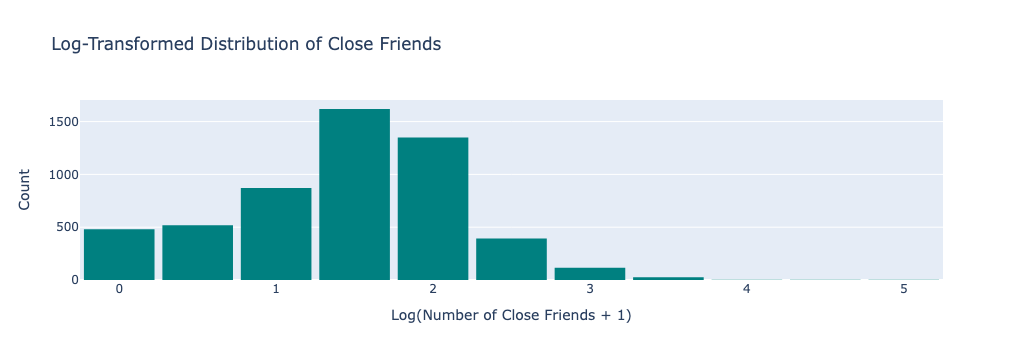

In [298]:
import numpy as np
import plotly.express as px

# Drop rows with NaN values in CONNECTION_social_num_close_friends
filtered_df = df_2.dropna(subset=['CONNECTION_social_num_close_friends']).copy()

# Apply log transformation
filtered_df['Log_Close_Friends'] = np.log1p(filtered_df['CONNECTION_social_num_close_friends'])  # log(1 + x) to handle 0s

# Create the histogram for log-transformed data
fig = px.histogram(
    filtered_df,
    x='Log_Close_Friends',
    title='Log-Transformed Distribution of Close Friends',
    labels={'Log_Close_Friends': 'Log(Number of Close Friends + 1)'},
    nbins=15,  # Adjust bin size
    color_discrete_sequence=['teal']
)

# Customize layout
fig.update_layout(
    xaxis_title='Log(Number of Close Friends + 1)',
    yaxis_title='Count',
    bargap=0.1
)

# Show the plot
fig.show()


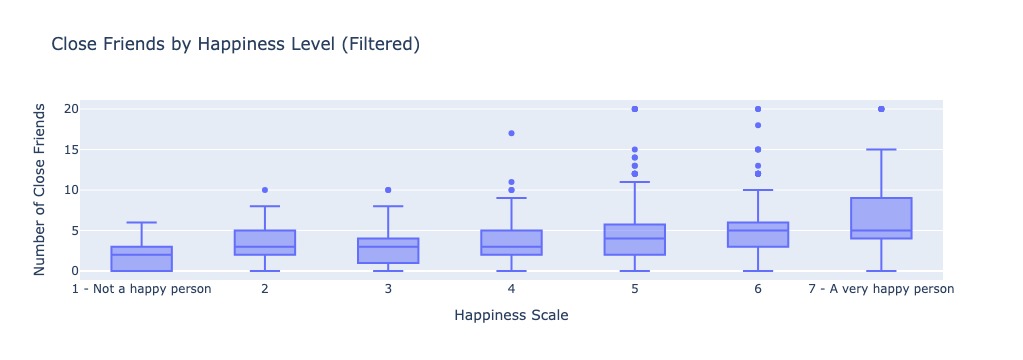

In [310]:
# Define a threshold to cap outliers
threshold = 20  # Adjust this value as appropriate
filtered_df = df_2[df_2['CONNECTION_social_num_close_friends'] <= threshold]

# Specify the correct order for the happiness scale
happiness_order = ['1 - Not a happy person', '2', '3', '4', '5', '6', '7 - A very happy person']

# Create a new box plot without extreme outliers and with ordered x-axis
fig = px.box(filtered_df, 
             x='WELLNESS_subjective_happiness_scale_happy', 
             y='CONNECTION_social_num_close_friends',
             title='Close Friends by Happiness Level (Filtered)',
             labels={'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale',
                     'CONNECTION_social_num_close_friends': 'Number of Close Friends'},
             category_orders={'WELLNESS_subjective_happiness_scale_happy': happiness_order})  # Enforce x-axis order
fig.show()


#### Research Question:

Is the frequency of physical affection, such as hugging, associated with reduced feelings of emotional emptiness and loneliness?

#### Variables 

CONNECTION_activities_hug_p3m and LONELY_dejong_emotional_social_loneliness_scale_emptiness

A bar chart for CONNECTION_activities_hug_p3m because it displays the frequency or proportion of each category, showing how often people engage in hugging activities. This helps identify which hugging frequency is most common.

A bar chart or pie chart for LONELY_dejong_emotional_social_loneliness_scale_emptiness because these charts clearly show the proportion of individuals who feel lonely versus those who do not, making the distribution easy to understand.

#### Analysis

##### Chi-Square Test of Independence
Purpose: Test if there is a statistically significant association between CONNECTION_activities_hug_p3m and LONELY_dejong_emotional_social_loneliness_scale_emptiness.
Why: Both variables are categorical (hugging frequency and binary loneliness), making a chi-square test ideal for examining their relationship.

##### Logistic Regression
Purpose: Model the relationship between CONNECTION_activities_hug_p3m (independent variable) and LONELY_dejong_emotional_social_loneliness_scale_emptiness (dependent variable, binary).
Convert CONNECTION_activities_hug_p3m into an ordinal or dummy-coded variable to use as a predictor.
Outcome: Odds ratios showing how changes in hugging frequency affect the odds of feeling lonely.
Why: Logistic regression provides insights into the strength and direction of the relationship while adjusting for potential confounders if needed.

##### Bootstrap the regressio to provide a confidence interval.
Bootstrapping tests robustness by repeatedly resampling the dataset with replacement and refitting the logistic regression model to generate a distribution of coefficient estimates. For the variables CONNECTION_activities_hug_p3m (hugging frequency) and LONELY_dejong_emotional_social_loneliness_scale_emptiness (loneliness), bootstrapping helps assess whether the estimated relationship between hugging frequency and loneliness is stable across different samples. If the coefficients for hugging frequency show little variation across bootstrap samples, this indicates the results are robust and not overly influenced by specific data points. However, if the coefficients vary significantly, it suggests that the relationship between hugging frequency and loneliness may be sensitive to the dataset and less reliable for generalization.


The method selected for analyzing the relationship between CONNECTION_activities_hug_p3m (hugging frequency) and LONELY_dejong_emotional_social_loneliness_scale_emptiness (loneliness) is logistic regression, as it is suitable for modeling a binary dependent variable (loneliness) with a categorical independent variable (hugging frequency). Logistic regression estimates the likelihood of feeling lonely ("Yes") based on different levels of hugging frequency, providing interpretable odds ratios. Assumptions of the model include independence of observations, a linear relationship between the log-odds of loneliness and the predictors, and absence of multicollinearity among predictors. Independence is satisfied as each individual represents a unique observation, and the log-odds linearity assumption will be checked by assessing residual patterns and potential interaction terms. To ensure robustness, bootstrapping will be used to validate the stability of the regression coefficients, particularly under potential data imbalances, providing reliable confidence intervals. This method is both contextually appropriate and rigorously applied, ensuring valid and interpretable results.

#### Hypothesis
H_0: There is no relationsip between how often people hug and if people feel lonely / empty. 
H_1: There is a relationship between how often people hug and if people feel lonely / empty.

The analysis between CONNECTION_activities_hug_p3m (frequency of hugging) and LONELY_dejong_emotional_social_loneliness_scale_emptiness could reveal if physical affection is associated with feelings of emotional emptiness or loneliness. A potential outcome might show a negative association, where individuals who engage in hugging more frequently report lower loneliness levels, suggesting that physical closeness may help alleviate feelings of emptiness. Alternatively, there may be no significant association, implying that loneliness is independent of physical touch frequency. This analysis is relevant to the course project as it explores factors contributing to loneliness, which can inform interventions focused on social connection and mental health. Understanding the link between physical affection and loneliness could lead to initiatives that encourage supportive, close interactions to reduce loneliness within communities.

In [320]:
df_3 = data[['CONNECTION_activities_hug_p3m', 'LONELY_dejong_emotional_social_loneliness_scale_emptiness', 'DATASET']].copy()

In [322]:
df_3.CONNECTION_activities_hug_p3m.unique()

array([nan, 'Daily or almost daily', 'Not in the past three months',
       'Weekly', 'A few times a week', 'Monthly', 'A few times a month',
       'Less than monthly'], dtype=object)

In [324]:
df_3.LONELY_dejong_emotional_social_loneliness_scale_emptiness.unique()

array(['Yes', 'No', 'More or less', nan], dtype=object)

In [328]:
hugging_emptiness = data[['CONNECTION_activities_hug_p3m', 'LONELY_dejong_emotional_social_loneliness_scale_emptiness', 'DATASET']].copy()
hugging_emptiness.dropna(inplace=True)
hugging_emptiness_2021 = hugging_emptiness[hugging_emptiness['DATASET'] == '2021 Cross-Sectional'].copy()

In [330]:
print(hugging_emptiness_2021.isna().sum())
hugging_emptiness_2021

CONNECTION_activities_hug_p3m                                0
LONELY_dejong_emotional_social_loneliness_scale_emptiness    0
DATASET                                                      0
dtype: int64


,CONNECTION_activities_hug_p3m,LONELY_dejong_emotional_social_loneliness_scale_emptiness,DATASET
4,Daily or almost daily,No,2021 Cross-Sectional
8,Weekly,Yes,2021 Cross-Sectional
10,Daily or almost daily,No,2021 Cross-Sectional
13,A few times a week,No,2021 Cross-Sectional
18,Daily or almost daily,More or less,2021 Cross-Sectional
...,...,...,...
11397,A few times a month,More or less,2021 Cross-Sectional
11398,Not in the past three months,More or less,2021 Cross-Sectional
11407,Weekly,More or less,2021 Cross-Sectional
11410,Weekly,No,2021 Cross-Sectional


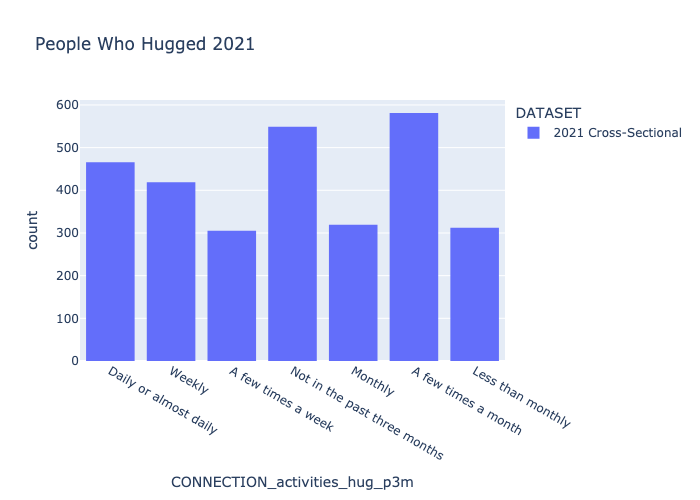

In [332]:
import plotly.express as px

fig = px.histogram(hugging_emptiness_2021,
                   x=hugging_emptiness_2021.CONNECTION_activities_hug_p3m,
                   color=hugging_emptiness_2021.DATASET,
                   title='People Who Hugged 2021')

fig.show(renderer='png')

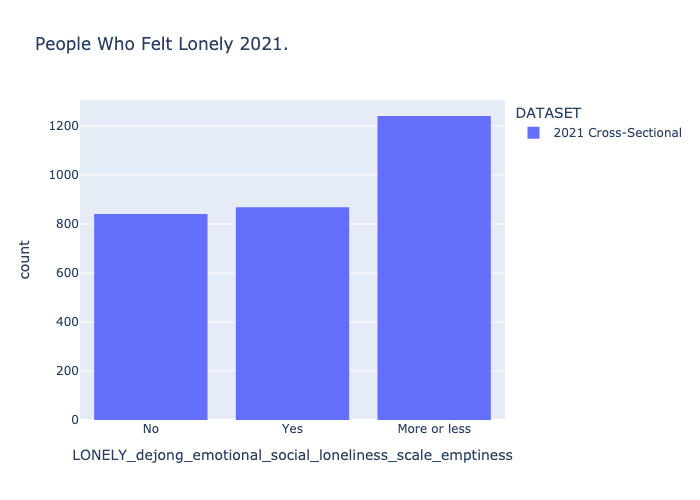

In [334]:
import plotly.express as px

fig = px.histogram(hugging_emptiness_2021,
             x=hugging_emptiness_2021.LONELY_dejong_emotional_social_loneliness_scale_emptiness,
             color=hugging_emptiness_2021.DATASET,
             title='People Who Felt Lonely 2021.')

fig.show(renderer='png')

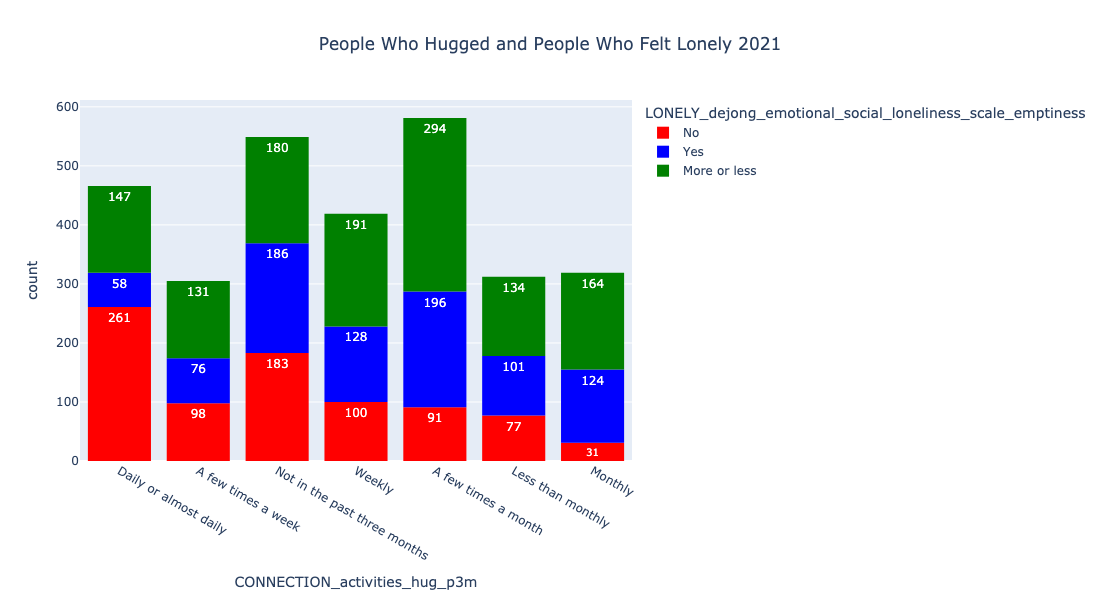

In [336]:
fig = px.histogram(hugging_emptiness_2021,
                   x='CONNECTION_activities_hug_p3m',
                   color='LONELY_dejong_emotional_social_loneliness_scale_emptiness',
                   title='People Who Hugged and People Who Felt Lonely 2021',
                   text_auto=True,
                   color_discrete_map={'No': 'red', 'Yes': 'blue', 'More or less': 'green'})  # Specify your color preferences here

fig.update_layout(
    width=1100,  # Adjust the width to your preference
    height=600,  # Adjust the height to your preference
    title_text='People Who Hugged and People Who Felt Lonely 2021',  # Ensure your title is properly set
    title_x=0.5  # Centers the title
)

fig.show(renderer='png')

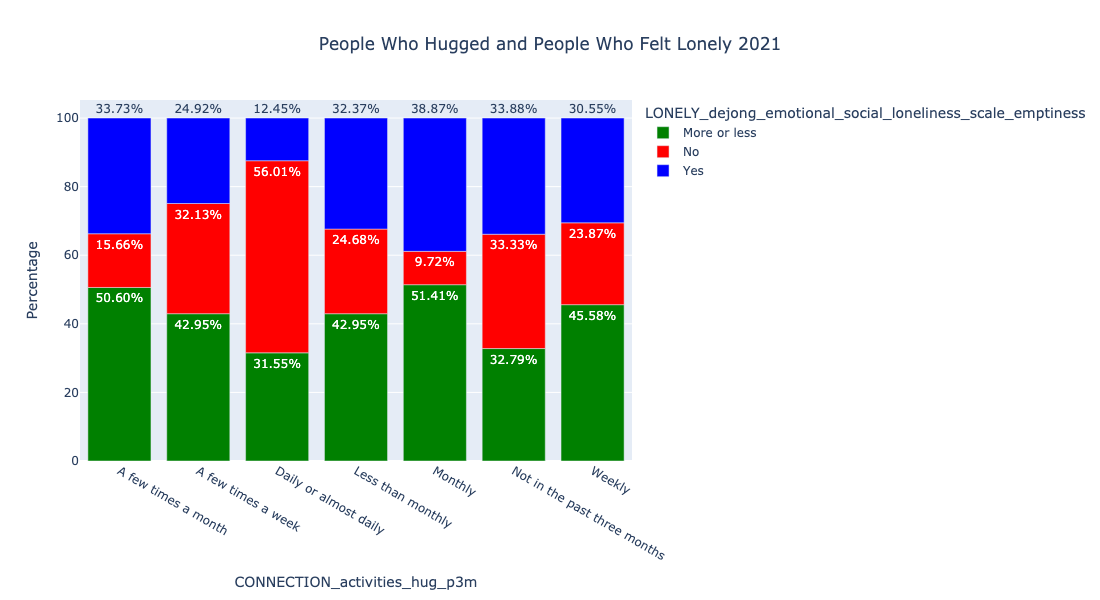

In [338]:
import pandas as pd
import plotly.express as px

# Assuming 'hugging_emptiness_2021' is your DataFrame and already includes the necessary data.
# Calculate percentages
grouped = hugging_emptiness_2021.groupby(['CONNECTION_activities_hug_p3m', 'LONELY_dejong_emotional_social_loneliness_scale_emptiness']).size().reset_index(name='counts')
total = grouped.groupby('CONNECTION_activities_hug_p3m')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total) * 100

# Define color map to keep colors consistent
color_map = {'No': 'red',  # red
             'Yes': 'blue',  # blue
             'More or less': 'green'}  # green

# Plot with Plotly Express using the defined color map
fig = px.bar(grouped,
             x='CONNECTION_activities_hug_p3m',
             y='percentage',
             color='LONELY_dejong_emotional_social_loneliness_scale_emptiness',
             text='percentage',
             title='People Who Hugged and People Who Felt Lonely 2021',
             color_discrete_map=color_map)  # Apply custom color map

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    width=1100,
    height=600,
    title_text='People Who Hugged and People Who Felt Lonely 2021',
    title_x=0.5,
    yaxis_title='Percentage'
)

fig.show(renderer='png')

##### 4. CONNECTION_social_num_close_friends and DEMO_relationship_status_single
Research Question: Is there a difference in the number of close friends between single individuals and those in relationships?

Analysis 
- Visualize the data. Histograms / boxplots / box plots / kde / violin
- Permutation testing. Test if the null hypothesis is true by calculatin a p-value.
- Chatgpt suggests the T-test and Mann-Whitene U Test to test the hypothesis.
- Double Bootstrapping. To determine the confidence interval for the mean difference in "WELLNESS_life_satisfaction" between In a relationship and not-selected groups
- Simple Linear Regression

H_0: There is no relationship between CONNECTION_social_num_close_friends and DEMO_relationship_status_single

Analyzing the relationship between CONNECTION_social_num_close_friends and DEMO_relationship_status_single may show whether being single is associated with having fewer or more close friends. Possible results could reveal that single individuals have either a greater or smaller number of close friends compared to those in relationships, or no significant difference, suggesting that relationship status does not impact the number of close friends. This insight is relevant to the course project as it sheds light on social dynamics and the role of relationships in shaping social networks. Understanding this relationship can help guide policies or initiatives aimed at strengthening social support systems for both single individuals and those in relationships, aligning with the course goal of enhancing community and mental health.

In [72]:
df_4 = data[['CONNECTION_social_num_close_friends', 'DEMO_relationship_status_single', 'DATASET']].copy()

In [80]:
df_4.CONNECTION_social_num_close_friends.unique()

array([ nan,   5.,   6.,   7.,   2.,   0.,   4.,   3.,  18.,   1.,  10.,
        12.,   8.,  17.,  11.,  20.,  14.,   9.,  16.,  15.,  25.,  13.,
        30.,  40., 150.,  60.,  24.,  19.,  23.,  27.,  50.,  22.,  35.,
       100.,  21., 106.,  33.])

In [78]:
df_4.DEMO_relationship_status_single.unique()

array(['Not Selected', 'Single', nan], dtype=object)

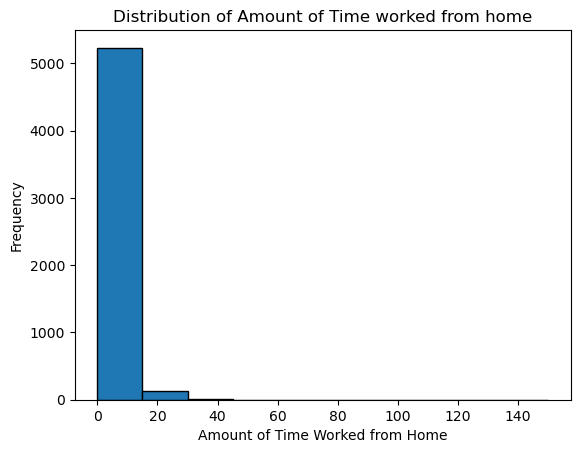

In [170]:
import matplotlib.pyplot as plt

plt.hist(df_4['CONNECTION_social_num_close_friends'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Amount of Time worked from home')
plt.xlabel('Amount of Time Worked from Home')
plt.ylabel('Frequency')
plt.show()

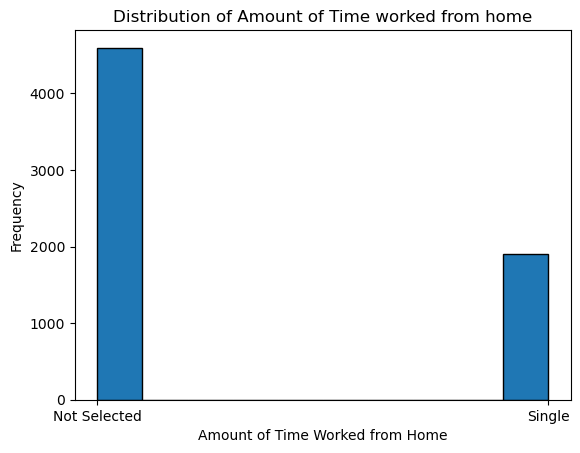

In [172]:
import matplotlib.pyplot as plt

plt.hist(df_4['DEMO_relationship_status_single'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Amount of Time worked from home')
plt.xlabel('Amount of Time Worked from Home')
plt.ylabel('Frequency')
plt.show()

In [160]:
df_5 = data[['WORK_shift_from_home', 'LONELY_ucla_loneliness_scale_isolated', 'DATASET']].copy()

In [162]:
df_5.WORK_shift_from_home.value_counts()

WORK_shift_from_home
Most of the time           684
Some of the time           558
All of the time            307
Very little of the time    234
Not at all                 204
Name: count, dtype: int64

In [158]:
df_5.LONELY_ucla_loneliness_scale_isolated.value_counts()

LONELY_ucla_loneliness_scale_isolated
Some of the time    1837
Hardly Ever         1187
Often                866
Name: count, dtype: int64

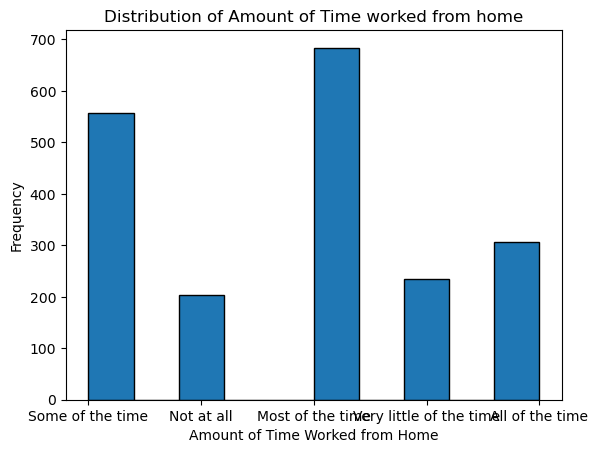

In [164]:
import matplotlib.pyplot as plt

plt.hist(df_5['WORK_shift_from_home'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Amount of Time worked from home')
plt.xlabel('Amount of Time Worked from Home')
plt.ylabel('Frequency')
plt.show()

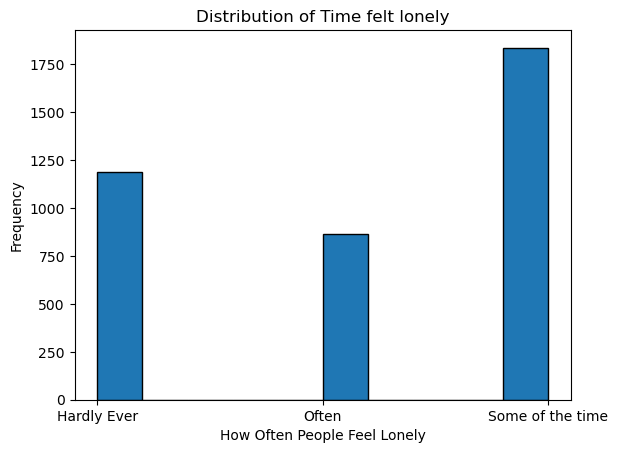

In [168]:
import matplotlib.pyplot as plt

plt.hist(df_5['LONELY_ucla_loneliness_scale_isolated'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Time felt lonely')
plt.xlabel('How Often People Feel Lonely')
plt.ylabel('Frequency')
plt.show()